### Exploring Customer Segmentation


<center>
    <img src = images/segments.jpeg>
</center>


In this activity, you are tasked with profiling customer groups for a large telecommunications company.  The data provided contains information on customers purchasing and useage behavior with the telecom products.  Your goal is to use PCA and clustering to segment these customers into meaningful groups, and report back your findings.  

Because these results need to be interpretable, it is important to keep the number of clusters reasonable.  Think about how you might represent some of the non-numeric features so that they can be included in your segmentation models.  You are to report back your approach and findings to the class.  Be specific about what features were used and how you interpret the resulting clusters.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv('data/telco_churn_data.csv')

In [6]:
df.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              3166 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      5517 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [8]:
df.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


In [9]:
drop_cols = ['Customer ID', 'Referred a Friend', 'Number of Referrals', 
             'Offer', 'Internet Type', 'Under 30', 'Senior Citizen', 
             'Dependents', 'City', 'Zip Code', 'Latitude', 'Longitude',
             'Population', 'CLTV', 'Churn Category', 'Churn Reason', 'Total Customer Svc Requests', 
             'Product/Service Issues Reported', 'Customer Satisfaction']

In [10]:
df_clean = df.drop(drop_cols, axis=1)

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Tenure in Months                   7043 non-null   int64  
 1   Phone Service                      7043 non-null   object 
 2   Avg Monthly Long Distance Charges  7043 non-null   float64
 3   Multiple Lines                     7043 non-null   object 
 4   Internet Service                   7043 non-null   object 
 5   Avg Monthly GB Download            7043 non-null   int64  
 6   Online Security                    7043 non-null   object 
 7   Online Backup                      7043 non-null   object 
 8   Device Protection Plan             7043 non-null   object 
 9   Premium Tech Support               7043 non-null   object 
 10  Streaming TV                       7043 non-null   object 
 11  Streaming Movies                   7043 non-null   objec

### Encoding Categorical Variables
- Binary Encoding
- One Hot Encoding

In [13]:
# Find columns that contain only "Yes" and "No"
object_cols = df_clean.select_dtypes('object').columns.tolist()
yes_no_columns = [col for col in object_cols if set(df[col].dropna().unique()) <= {"Yes", "No"}]

# Convert "Yes" to 1 and "No" to 0 for yes_no_columns and convert the column type as int
for col in yes_no_columns:
    if set(df_clean[col].unique()) == {"Yes", "No"}:  # Ensure the column only contains "Yes" and "No"
        df_clean[col] = df_clean[col].replace({"Yes": 1, "No": 0}).astype(int)

# Verify the conversion
print(df_clean[yes_no_columns].head())

   Phone Service  Multiple Lines  Internet Service  Online Security  \
0              0               0                 1                0   
1              1               1                 1                0   
2              1               1                 1                0   
3              1               0                 1                0   
4              1               1                 1                0   

   Online Backup  Device Protection Plan  Premium Tech Support  Streaming TV  \
0              0                       1                     0             0   
1              1                       0                     0             0   
2              0                       0                     0             1   
3              1                       1                     0             1   
4              0                       0                     0             0   

   Streaming Movies  Streaming Music  Unlimited Data  Paperless Billing  \
0                

In [14]:
object_cols = df_clean.select_dtypes('object').columns.tolist()
object_cols

['Contract', 'Payment Method', 'Gender']

In [15]:
df_encoded = pd.get_dummies(df_clean, dtype = int)
df_encoded.describe()

,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,...,Number of Dependents,Churn Value,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Payment Method_Mailed Check,Gender_Female,Gender_Male
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.386767,0.903166,22.958954,0.421837,0.783331,21.110890,0.286668,0.344881,0.343888,0.290217,...,0.468692,0.265370,0.512566,0.220077,0.267358,0.555019,0.390317,0.054664,0.495244,0.504756
std,24.542061,0.295752,15.448113,0.493888,0.412004,20.948471,0.452237,0.475363,0.475038,0.453895,...,0.962802,0.441561,0.499878,0.414328,0.442612,0.496999,0.487856,0.227340,0.500013,0.500013
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,9.210000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,1.000000,22.890000,0.000000,1.000000,17.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,1.000000,36.395000,1.000000,1.000000,28.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,72.000000,1.000000,49.990000,1.000000,1.000000,94.000000,1.000000,1.000000,1.000000,1.000000,...,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Tenure in Months                   7043 non-null   int64  
 1   Phone Service                      7043 non-null   int64  
 2   Avg Monthly Long Distance Charges  7043 non-null   float64
 3   Multiple Lines                     7043 non-null   int64  
 4   Internet Service                   7043 non-null   int64  
 5   Avg Monthly GB Download            7043 non-null   int64  
 6   Online Security                    7043 non-null   int64  
 7   Online Backup                      7043 non-null   int64  
 8   Device Protection Plan             7043 non-null   int64  
 9   Premium Tech Support               7043 non-null   int64  
 10  Streaming TV                       7043 non-null   int64  
 11  Streaming Movies                   7043 non-null   int64

### PCA

In [18]:
pca = PCA()

In [19]:
pca.fit(df_encoded)

PCA()

In [20]:
pca.explained_variance_ratio_

array([8.73502347e-01, 6.91719764e-02, 5.70889434e-02, 1.10506643e-04,
       6.48702156e-05, 2.55245002e-05, 1.58464626e-05, 9.97049628e-06,
       9.33278364e-06, 1.40092093e-07, 7.90269744e-08, 6.82204096e-08,
       4.86093709e-08, 4.12534114e-08, 3.69641951e-08, 3.37572947e-08,
       2.96772129e-08, 2.87701061e-08, 2.50767834e-08, 2.37401885e-08,
       2.26772861e-08, 2.16716639e-08, 2.01557272e-08, 1.85384755e-08,
       1.60466883e-08, 1.16347130e-08, 8.85752051e-09, 4.58058498e-09,
       2.81307729e-09, 6.12805269e-33, 6.12805269e-33, 6.12805269e-33])

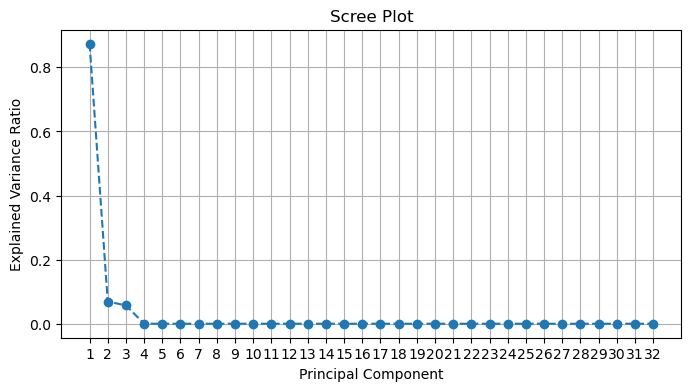

In [21]:
# Explained variance
explained_variance = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance) + 1, step=1))
plt.grid(True)
plt.show()

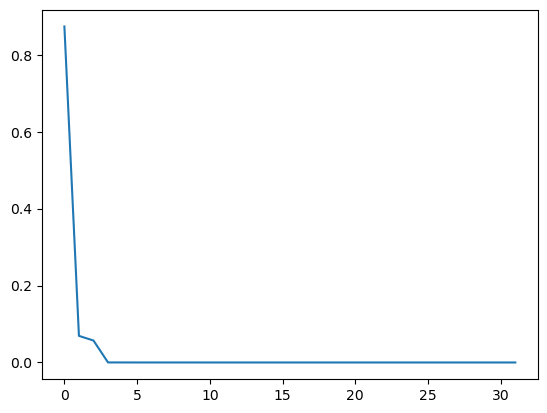

In [22]:
plt.plot(pca.explained_variance_ratio_)

In [71]:
# Step 1: Fit PCA
pca = PCA(n_components=3, random_state=42)  # Choose the number of components you want
pca.fit(df_encoded)

# Step 2: Transform Data
np_pca = pca.transform(df_encoded)
df_pca = pd.DataFrame(np_pca)
df_pca

,0,1,2
0,-2371.394000,191.922032,-29.920246
1,-1690.644155,-15.928068,86.869067
2,-675.288151,298.984647,-328.791919
3,171.194491,290.301529,-94.782506
4,463.342925,625.618583,-166.826052
...,...,...,...
7038,-653.899874,-1062.105938,239.224990
7039,-289.115084,-261.420445,-151.537130
7040,5774.726602,1166.578498,3094.945900
7041,-2076.437514,244.024489,-95.770482


In [73]:
# Step 3: Perform Clustering
kmeans = KMeans(n_clusters=3, n_init=10, random_state=123)  # Specify the number of clusters you want
kmeans.fit(df_pca)

# Get cluster labels
cluster_labels = kmeans.labels_
cluster_labels

array([2, 2, 2, ..., 0, 2, 0], dtype=int32)

In [75]:
kmeans.inertia_

9754430051.712141

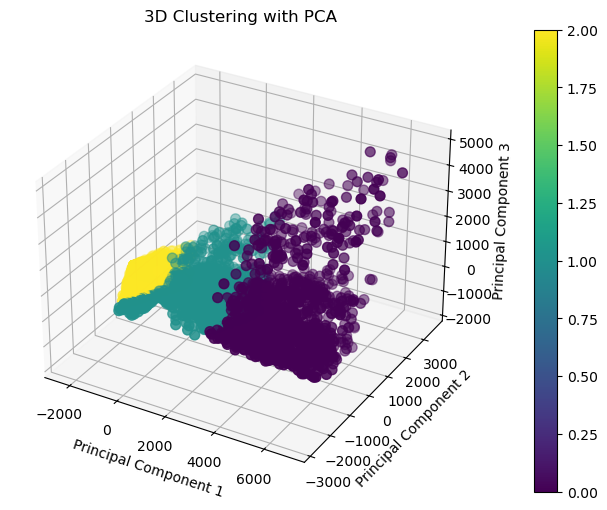

In [77]:
# Step 3: Plot 3D Clusters
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot data points with cluster labels
scatter = ax.scatter(np_pca[:, 0], np_pca[:, 1], np_pca[:, 2], c=cluster_labels, cmap='viridis', s=50)

# Add labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Clustering with PCA')

# Add color bar
plt.colorbar(scatter)

plt.show()

In [27]:
df['Cluster Label'] = kmeans.labels_
df.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction,Cluster Label
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,...,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN,2
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN,2
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN,2
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0,1
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0,1


In [28]:
object_cols = df.select_dtypes('object').columns.tolist()
numeric_cols = df.select_dtypes(include='number').columns

In [29]:
df.groupby("Cluster Label")[numeric_cols].median()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,...,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction,Cluster Label
Cluster Label,,,,,,,,,,,,,,,,,,,,,
0,1.0,66.0,27.140,22.0,99.800,6069.250,0.0,158.470,1700.680,46.0,...,93513.0,36.276880,-119.521370,16164.0,0.0,5168.0,1.0,0.0,3.0,0.0
1,1.0,42.0,23.745,20.0,77.288,3010.575,0.0,47.385,880.155,48.0,...,93460.0,36.008958,-119.526775,17621.0,0.0,4586.0,1.0,0.0,3.0,1.0
2,0.0,11.0,21.115,12.0,49.400,492.325,0.0,0.000,139.785,45.0,...,93529.5,36.196166,-119.642281,18030.0,0.0,4176.0,1.0,0.0,3.0,2.0


In [30]:
df_clean['Cluster Label'] = kmeans.labels_
df_clean.head()

,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,...,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Gender,Age,Married,Number of Dependents,Churn Value,Cluster Label
0,1,0,0.00,0,1,9,0,0,1,0,...,39.65,0.00,0.0,0.00,Male,78,0,0,1,2
1,8,1,48.85,1,1,19,0,1,0,0,...,633.30,0.00,120.0,390.80,Female,74,1,1,1,2
2,18,1,11.33,1,1,57,0,0,0,0,...,1752.55,45.61,0.0,203.94,Male,71,0,3,1,2
3,25,1,19.76,0,1,13,0,1,1,0,...,2514.50,13.43,327.0,494.00,Female,78,1,1,1,1
4,37,1,6.33,1,1,15,0,0,0,0,...,2868.15,0.00,430.0,234.21,Female,80,1,1,1,1


In [31]:
object_cols = df_clean.select_dtypes('object').columns.tolist()
numeric_cols = df_clean.select_dtypes(include='number').columns

In [32]:
df_clean.groupby("Cluster Label")[numeric_cols].median()

,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,...,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Married,Number of Dependents,Churn Value,Cluster Label
Cluster Label,,,,,,,,,,,,,,,,,,,,,
0,66.0,1.0,27.140,1.0,1.0,22.0,1.0,1.0,1.0,1.0,...,99.800,6069.250,0.0,158.470,1700.680,46.0,1.0,0.0,0.0,0.0
1,42.0,1.0,23.745,1.0,1.0,20.0,0.0,0.0,0.0,0.0,...,77.288,3010.575,0.0,47.385,880.155,48.0,1.0,0.0,0.0,1.0
2,11.0,1.0,21.115,0.0,1.0,12.0,0.0,0.0,0.0,0.0,...,49.400,492.325,0.0,0.000,139.785,45.0,0.0,0.0,0.0,2.0


In [33]:
for col in object_cols:
    print(df.groupby("Cluster Label")[col].agg(pd.Series.mode))
    print("\n")

Cluster Label
0          Two Year
1    Month-to-Month
2    Month-to-Month
Name: Contract, dtype: object


Cluster Label
0    Bank Withdrawal
1    Bank Withdrawal
2    Bank Withdrawal
Name: Payment Method, dtype: object


Cluster Label
0    Male
1    Male
2    Male
Name: Gender, dtype: object




In [34]:
grouped_median = df_clean.groupby("Cluster Label")[numeric_cols].median()

# Display the grouped median DataFrame
print(grouped_median)

               Tenure in Months  Phone Service  \
Cluster Label                                    
0                          66.0            1.0   
1                          42.0            1.0   
2                          11.0            1.0   

               Avg Monthly Long Distance Charges  Multiple Lines  \
Cluster Label                                                      
0                                         27.140             1.0   
1                                         23.745             1.0   
2                                         21.115             0.0   

               Internet Service  Avg Monthly GB Download  Online Security  \
Cluster Label                                                               
0                           1.0                     22.0              1.0   
1                           1.0                     20.0              0.0   
2                           1.0                     12.0              0.0   

               Online 

In [35]:
# Save the grouped median DataFrame to an Excel file
grouped_median.to_excel('grouped_median.xlsx', index=True)  # index=True to include the 'Cluster Label' in the Excel sheet

In [36]:
df_encoded['Cluster Label'] = kmeans.labels_

In [37]:
print(df_encoded.groupby("Cluster Label")[numeric_cols].median())

               Tenure in Months  Phone Service  \
Cluster Label                                    
0                          66.0            1.0   
1                          42.0            1.0   
2                          11.0            1.0   

               Avg Monthly Long Distance Charges  Multiple Lines  \
Cluster Label                                                      
0                                         27.140             1.0   
1                                         23.745             1.0   
2                                         21.115             0.0   

               Internet Service  Avg Monthly GB Download  Online Security  \
Cluster Label                                                               
0                           1.0                     22.0              1.0   
1                           1.0                     20.0              0.0   
2                           1.0                     12.0              0.0   

               Online 